In [13]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [14]:
plt.style.use("ggplot")
plt.rcParams["font.sans-serif"] = ["SimHei"]

In [15]:
f_path = "C:/Users/Dell/Documents/data/FQ304大修人员剂量明细.xlsx"

In [16]:
def get_data(file):
    data = pd.read_excel(
        file,
        sheet_name="数据源",
        usecols=[
            "人员编号",
            "姓名",
            "单位",
            "处室",
            "机组",
            "进入区域",
            "进入时间",
            "离开时间",
            "持续时间(h)",
            "EPD-γ剂量(mSv)"
        ],
        dtype={
            "人员编号": str,
            "进入时间": "datetime64",
            "离开时间": "datetime64"
        }
    )
    return data

In [17]:
def get_daily_person_data(data):
    daily_person_data = pd.pivot_table(
        data,
        index=[
            pd.Grouper(key = "离开时间", freq = "D"),
            "人员编号",
            "姓名",
            "处室",
            "单位"
        ],
        aggfunc={
            "EPD-γ剂量(mSv)": np.sum,
            "人员编号": np.count_nonzero,
            "持续时间(h)": np.sum
        }
    )
    return daily_person_data


In [18]:
def get_daily_data(data):
    daily_data = pd.pivot_table(
        data,
        index = [pd.Grouper(key = "离开时间", freq = "D")],
        aggfunc={
            "EPD-γ剂量(mSv)": np.sum,
            "人员编号": np.count_nonzero,
            "持续时间(h)": np.sum
        }
    )
    return daily_data

In [19]:
first_dt = pd.to_datetime("2021/8/22 8:00")
last_dt = pd.to_datetime("2021/9/19 11:46")

In [20]:
selected_date = pd.to_datetime("2021/9/10")
next_selected_date = selected_date + datetime.timedelta(days=1)

In [21]:
if f_path:
    data = get_data(f_path).query("离开时间 < @next_selected_date")
    daily_person_data = get_daily_person_data(data)
    daily_data = get_daily_data(data)

In [22]:
daily_data.index

DatetimeIndex(['2021-08-22', '2021-08-23', '2021-08-24', '2021-08-25',
               '2021-08-26', '2021-08-27', '2021-08-28', '2021-08-29',
               '2021-08-30', '2021-08-31', '2021-09-01', '2021-09-02',
               '2021-09-03', '2021-09-04', '2021-09-05', '2021-09-06',
               '2021-09-07', '2021-09-08', '2021-09-09', '2021-09-10'],
              dtype='datetime64[ns]', name='离开时间', freq='D')

<AxesSubplot:xlabel='离开时间'>

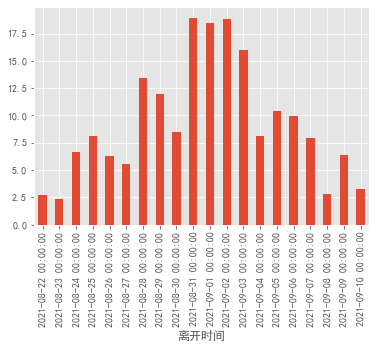

In [23]:
daily_data["EPD-γ剂量(mSv)"].plot(kind="bar")

<BarContainer object of 20 artists>

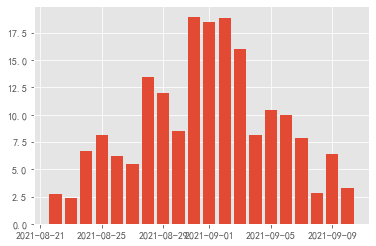

In [24]:
fig, ax = plt.subplots()

# labels = ["剂量", "人次", "工时"]

ax.bar(daily_data.index, daily_data["EPD-γ剂量(mSv)"], label="剂量")


# ax.set_yticklabels(labels)

# fig.tight_layout()